In [67]:
import tensorflow as tf
import numpy as np

In [49]:
def unpickle(file):
    import cPickle
    fo = open(file, 'rb')
    dict = cPickle.load(fo)
    fo.close()
    return dict

data1  = unpickle('../data_batch_1')
data2  = unpickle('../data_batch_2')
data3  = unpickle('../data_batch_3')
data4  = unpickle('../data_batch_4')
data5  = unpickle('../data_batch_5')

In [54]:
all_data = np.concatenate((get_proper_images(data1['data']), 
                           get_proper_images(data2['data']), 
                           get_proper_images(data3['data']), 
                           get_proper_images(data4['data']), 
                           get_proper_images(data5['data'])))

In [59]:
all_labels = np.concatenate((onehot_labels(data1['labels']), 
                           onehot_labels(data2['labels']), 
                           onehot_labels(data3['labels']), 
                           onehot_labels(data4['labels']), 
                           onehot_labels(data5['labels'])))

In [64]:
test_data = get_proper_images(unpickle('../test_batch')['data'])

In [68]:
test_labels = onehot_labels(unpickle('../test_batch')['labels'])

In [69]:
test_labels.shape

(10000, 10)

In [51]:
def get_proper_images(raw):
    raw_float = np.array(raw, dtype=float) / 255.0
    images = raw_float.reshape([-1, 3, 32, 32])
    images = images.transpose([0, 2, 3, 1])
    return images

In [53]:
def onehot_labels(labels):
    return np.eye(10)[labels]

In [71]:
def weight_variable(shape):
  initial = tf.truncated_normal(shape, stddev=0.1)
  return tf.Variable(initial)

def bias_variable(shape):
  initial = tf.constant(0.1, shape=shape)
  return tf.Variable(initial)


# 1. Define Variables and Placeholders
X = tf.placeholder(tf.float32, [None, 32,32, 3]) #the first dimension (None) will index the images
Y_ = tf.placeholder(tf.float32, [None, 10])


batch = tf.Variable(0)
lr= tf.train.exponential_decay(
  0.15,                # Base learning rate.
  batch * 100,  # Current index into the dataset.
  1*100,          # Decay step.
  0.95,                # Decay rate.
  staircase=True)

#XX = tf.reshape(X, [-1,784])

x_image = tf.reshape(X, [-1,32,32,3])

#define weight variable for a convolutional layer
#Conv layer 1
W_1 = tf.Variable(tf.truncated_normal([5, 5,3, 4], stddev=0.1))
b_conv1 = tf.Variable(tf.constant(0.1, shape=[4]))    
Y_1 = tf.nn.relu(tf.nn.conv2d(X, W_1, strides=[1,1,1,1], padding='SAME') + b_conv1)

#Conv layer 2
W_2 = tf.Variable(tf.truncated_normal([5, 5, 4, 8], stddev=0.1))
b_conv2 = tf.Variable(tf.constant(0.1, shape=[8]))    
Y_2 = tf.nn.relu(tf.nn.conv2d( Y_1 , W_2, strides=[1,2,2,1], padding='SAME') + b_conv2)

#Conv layer 3
W_3 = tf.Variable(tf.truncated_normal([5, 5, 8, 12], stddev=0.1))
b_conv3 = tf.Variable(tf.constant(0.1, shape=[12]))    
Y_3 = tf.nn.relu(tf.nn.conv2d( Y_2 , W_3, strides=[1,2,2,1], padding='SAME') + b_conv3)

Y_3_flat = tf.reshape(Y_3, [-1, 8*8*12])

#Densely connected layer
W_dense = tf.Variable(tf.truncated_normal([8*8*12, 200], stddev=0.1)) 
B_dense= tf.Variable(tf.constant(0.1, shape=[200]))
relu_dense_scores = tf.nn.relu(tf.matmul(Y_3_flat, W_dense) + B_dense)


pkeep = tf.placeholder(tf.float32)
relu_dense_scores_drop = tf.nn.dropout(relu_dense_scores, pkeep)


#Readout layer
W_sm = tf.Variable(tf.truncated_normal([200, 10], stddev=0.1)) 
b_sm = tf.Variable(tf.zeros([10]))

Ylogits = tf.matmul(relu_dense_scores_drop, W_sm) + b_sm
Y = tf.nn.softmax(Ylogits)

# 3. Define the loss function
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(Ylogits, Y_) # calculate cross-entropy with logits
cross_entropy = tf.reduce_mean(cross_entropy)


correct_prediction = tf.equal(tf.argmax(Y,1), tf.argmax(Y_,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))


# 5. Define an optimizer
# with GD and learning rate 0.5 the accuracy is 0.12
train_step = tf.train.AdamOptimizer(0.005).minimize(cross_entropy , global_step=batch )

0 0 100 0
0.0912
100 10000 10100 100
0.2744
200 20000 20100 200
0.3294
300 30000 30100 300
0.3846
400 40000 40100 400
0.4027
500 0 100 0
0.4192
600 10000 10100 100
0.447
700 20000 20100 200
0.4458
800 30000 30100 300
0.4631
900 40000 40100 400
0.4484
1000 0 100 0
0.47
1100 10000 10100 100
0.4919
1200 20000 20100 200
0.4777
1300 30000 30100 300
0.4922
1400 40000 40100 400
0.4922
1500 0 100 0
0.4923
1600 10000 10100 100
0.505
1700 20000 20100 200
0.4987
1800 30000 30100 300
0.4955
1900 40000 40100 400
0.4837
2000 0 100 0
0.5011
2100 10000 10100 100
0.5127
2200 20000 20100 200
0.4971
2300 30000 30100 300
0.5095
2400 40000 40100 400
0.5027
2500 0 100 0
0.4759
2600 10000 10100 100
0.5095
2700 20000 20100 200
0.4886
2800 30000 30100 300
0.5159
2900 40000 40100 400
0.5014
3000 0 100 0
0.51
3100 10000 10100 100
0.5087
3200 20000 20100 200
0.4904
3300 30000 30100 300
0.4989
3400 40000 40100 400
0.4926
3500 0 100 0
0.5077
3600 10000 10100 100
0.5034
3700 20000 20100 200
0.481
3800 30000 30100 30

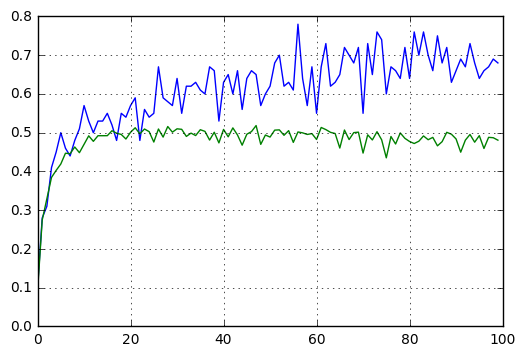

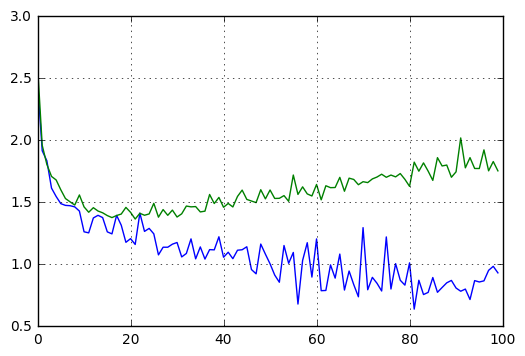

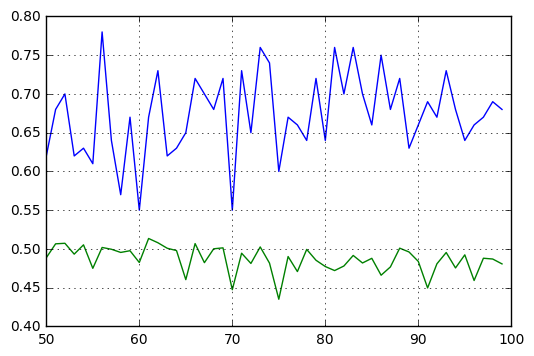

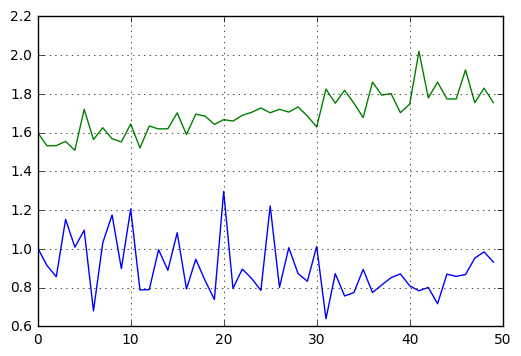

In [77]:

# initialize
init = tf.initialize_all_variables()
sess = tf.Session()
sess.run(init)


def training_step(i, update_test_data, update_train_data):
    ii = (i % 50000)
    batch = ii % 500
    begin = batch*100
    end = begin +100
    ####### actual learning 
    # reading batches of 100 images with 100 labels
    batch_X  = all_data[begin:end]
    batch_Y = all_labels[begin:end]
    # the backpropagation training step
    sess.run(train_step, feed_dict={X: batch_X, Y_: batch_Y , pkeep: 0.75})
    
    ####### evaluating model performance for printing purposes
    # evaluation used to later visualize how well you did at a particular time in the training
    train_a = []
    train_c = []
    test_a = []
    test_c = []
    if update_train_data:
        a, c = sess.run([accuracy, cross_entropy], feed_dict={X: batch_X, Y_: batch_Y , pkeep: 0.75 })
        train_a.append(a)
        train_c.append(c)

    if update_test_data:
        a, c = sess.run([accuracy, cross_entropy], feed_dict={X: test_data, Y_: test_labels , pkeep: 1.0 })
        test_a.append(a)
        print "\r", i,  begin , end , batch
        print(a)
        test_c.append(c)

    
    return (train_a, train_c, test_a, test_c)


# 6. Train and test the model, store the accuracy and loss per iteration

train_a = []
train_c = []
test_a = []
test_c = []
    
training_iter = 10000
epoch_size = 100
for i in range(training_iter):
    test = False
    if i % epoch_size == 0:
        test = True
    a, c, ta, tc = training_step(i, test, test)
    train_a += a
    train_c += c
    test_a += ta
    test_c += tc
    
# 7. Plot and visualise the accuracy and loss

# accuracy training vs testing dataset
plt.plot(train_a)
plt.plot(test_a)
plt.grid(True)
plt.show()

# loss training vs testing dataset
plt.plot(train_c)
plt.plot(test_c)
plt.grid(True)
plt.show()

# Zoom in on the tail of the plots
zoom_point = 50
x_range = range(zoom_point,training_iter/epoch_size)
plt.plot(x_range, train_a[zoom_point:])
plt.plot(x_range, test_a[zoom_point:])
plt.grid(True)
plt.show()

plt.plot(train_c[zoom_point:])
plt.plot(test_c[zoom_point:])
plt.grid(True)
plt.show()